# Image Registration Using Homography
This notebook demonstrates how to use 4 point correspondences to compute a homography matrix and apply it for image registration using OpenCV.

# cv2.getPerspective
Transform is used in OpenCV to compute a 3×3 homography matrix that defines a perspective transformation between two sets of points

# cv2.warpPerspective
Is a function in OpenCV used to apply a perspective transformation (i.e., a homography) to an image. It's commonly used for tasks like image rectification, document scanning, panorama stitching, and correcting perspective distortions.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

# Step 1: Create the source image (white rectangle on black background)
image1 = np.zeros((400, 400, 3), dtype=np.uint8)
cv2.rectangle(image1, (100, 100), (300, 300), (255, 255, 255), -1)

# Step 2: Define 4 corresponding points
pts_src = np.array([[100, 100], [300, 100], [300, 300], [100, 300]], dtype=np.float32)
pts_dst = np.array([[80, 120], [320, 80], [280, 320], [100, 340]], dtype=np.float32)

# Step 3: Compute the homography matrix
H = cv2.getPerspectiveTransform(pts_src, pts_dst)
print("Homography Matrix H:\n", H)

# Step 4: Warp the source image to align with the destination view
image2 = cv2.warpPerspective(image1, H, (400, 400))

Homography Matrix H:
 [[ 1.27826087e+00  3.00000000e-01 -6.56521739e+01]
 [-2.56521739e-01  1.89565217e+00 -2.56521739e+01]
 [-3.26086957e-04  1.84782609e-03  1.00000000e+00]]


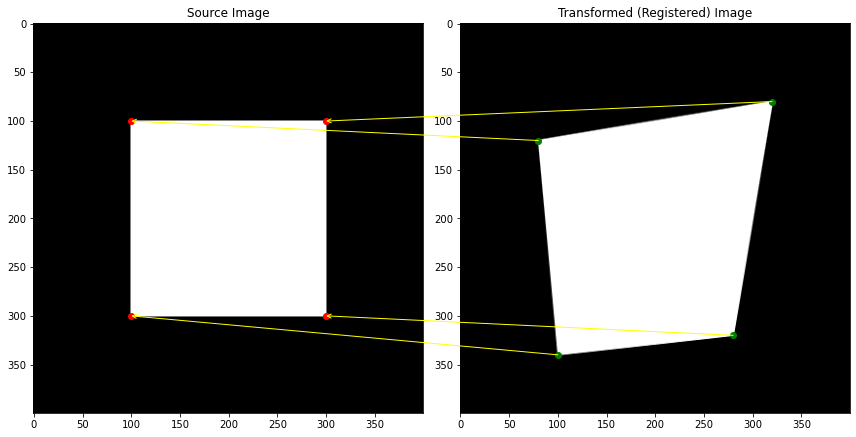

In [2]:
# Step 5: Visualize the source and transformed images with point correspondences
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
ax[0].set_title("Source Image")
ax[0].scatter(pts_src[:, 0], pts_src[:, 1], c='r')

ax[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
ax[1].set_title("Transformed (Registered) Image")
ax[1].scatter(pts_dst[:, 0], pts_dst[:, 1], c='g')

# Draw yellow connection lines between corresponding points
for i in range(len(pts_src)):
    con = ConnectionPatch(xyA=(pts_dst[i, 0], pts_dst[i, 1]), coordsA=ax[1].transData,
                          xyB=(pts_src[i, 0], pts_src[i, 1]), coordsB=ax[0].transData,
                          arrowstyle="->", color="yellow")
    fig.add_artist(con)

plt.tight_layout()
plt.show()